## Homework 3

In [0]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import mixture
from scipy import optimize

####Function definations that are used in the notebook

In [0]:
def multi_sci(n, mean, sigma, mod_num, xdat):
  '''
  Input: n-dimention, mu-mean, sig-covariance matrix, x-data vector
  returns the probability p(x/c1) distribution of the sample
  '''
  plx = np.zeros([model, xdat.shape[1]])
  # print(xdat.shape)
  for mod in range(mod_num):
    mu = mean[mod,:,:]
    sig = sigma[mod,:,:]
    for i in range(xdat.shape[1]):
      plx[mod,i] = ((2*np.pi)**(-n/2))*(np.linalg.det(sig)**(-0.5))*(np.exp(-0.5*(xdat[:,i].reshape(2,1) - mu.reshape(2,1)).T@np.linalg.inv(sig)@(xdat[:,i].reshape(2,1) - mu.reshape(2,1))))

  return plx

In [0]:
def multi(n, mean, sigma, mod_num, xdat):
  '''
  Input: n-dimention, mu-mean, sig-covariance matrix, x-data vector
  returns the probability p(x/c1) distribution of the sample
  '''
  plx = np.zeros([model, xdat.shape[1]])
  # print(xdat.shape)
  for mod in range(mod_num):
    mu = mean[mod,:,:]
    sig = sigma[mod,:,:]
    for i in range(xdat.shape[1]):
      plx[mod,i] = ((2*np.pi)**(-n/2))*(np.linalg.det(sig)**(-0.5))*(np.exp(-0.5*(xdat[:,i].reshape(2,1) - mu.reshape(2,1)).T@np.linalg.inv(sig)@(xdat[:,i].reshape(2,1) - mu.reshape(2,1))))

  return plx

In [0]:
def linear_transform(N, n, mean, sigma, pl):
  '''
  Input: N-samples, n-dimension, mu-mean vector, sig-covariance matrix
  returns random samples generated according to priors, mu and sig
  '''
  
  # number = np.zeros(4,) 
  
  tempo = np.random.rand(1,N) # generating N random samples
  pl_mod = np.cumsum(pl) # cumulative sum
  pl_mod = np.insert(pl_mod, 0, 0) # pl_mod is now [0 0.1 0.3 0.5 1] and we take ranges between them for the three classes

  x = np.zeros([n,N])
  ls = []

  for i in range(mean.shape[0]):
    if (i != 3):
      number = np.where((tempo >= pl_mod[i]) & (tempo < pl_mod[i+1]))[1]
      x[:,number] = np.random.multivariate_normal(mean[i,:,:].reshape(2,), sigma[i,:,:], len(number)).T
    else:
      number = np.where((tempo >= pl_mod[i]) & (tempo <= pl_mod[i+1]))[1]
      x[:,number] = np.random.multivariate_normal(mean[i,:,:].reshape(2,), sigma[i,:,:], len(number)).T
    ls.append(number)
    
  return (x,ls)

###Answer 1

In [0]:
N = 100
n = 2
mu_true = np.array([[-1, 2], [2, 2], [-1, -2], [2, -2]]).reshape(4,2,1) # mean values
sigma_true = np.array([[0.2, 0, 0, 0.2], [1, -0.4, -0.4, 0.5], [1, 0, 0, 0.2], [0.2, 0, 0, 1]]).reshape(4,2,2) # Sigma true values
alpha_true = np.array([0.1, 0.2, 0.2, 0.5]) # alpha values

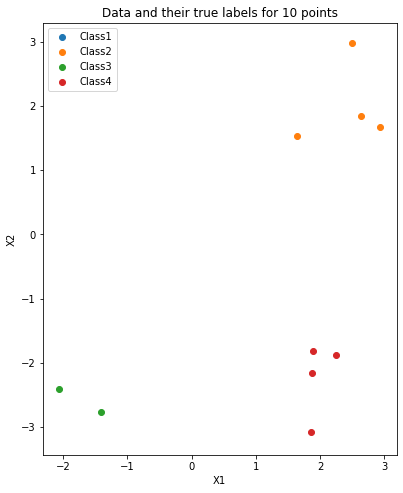

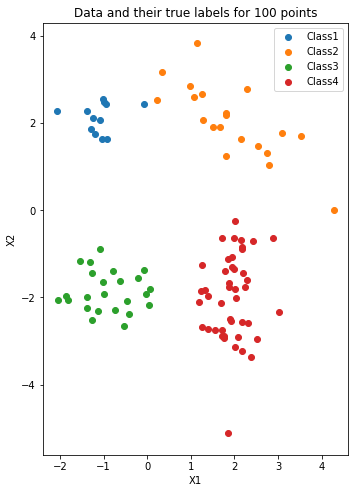

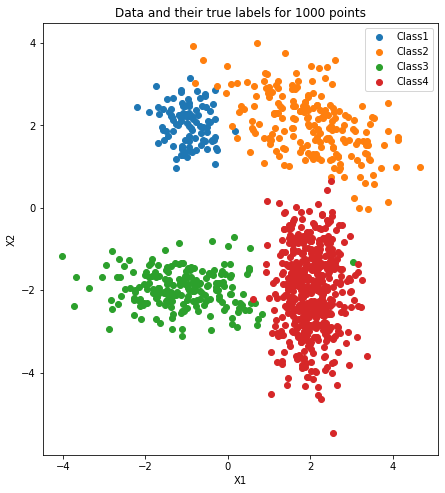

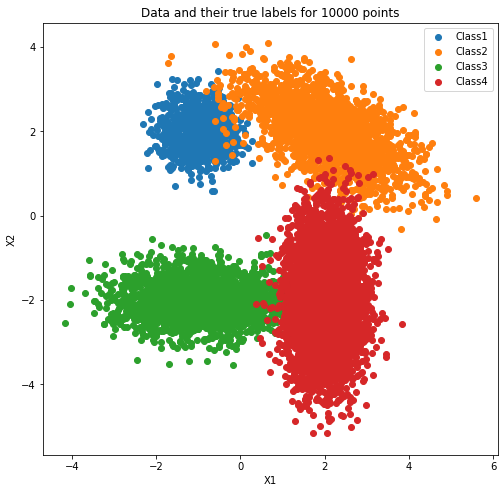

In [344]:
k = 10 # 10-Fold validation
gauss_comps = [1,2,3,4,5,6]
N = [10, 100, 1000, 10000]

# Variables to store the mean, sigma and alpha values in every iteration
pred = []
pred_test = []
pred_alpha = []
pred_mean = []
pred_cov = []
for N in [10,100,1000,10000]:
  best_mod = []
  best_mod_test = []
  best_mod_alpha = []
  best_mod_mean = []
  best_mod_cov = []
  data, indices = linear_transform(N, n, mu_true, sigma_true, alpha_true)

  # Plotting the true data distributions
  plt.figure()
  plt.axes([1,1,1.5,1.5])
  plt.scatter(data[0,indices[0]], data[1,indices[0]])
  plt.scatter(data[0,indices[1]], data[1,indices[1]])
  plt.scatter(data[0,indices[2]], data[1,indices[2]])
  plt.scatter(data[0,indices[3]], data[1,indices[3]])
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title('Data and their true labels for {} points'.format(N))
  plt.legend(('Class1', 'Class2', 'Class3', 'Class4'))
  plt.gca().set_aspect('equal', adjustable='box')

  for model in gauss_comps: # evaluating for 6 model orders
    mod_eva = []
    mod_test = []
    mod_mean = []
    mod_cov = []
    mod_alpha = []
    for fold in range(k):
      val_data = data[:,fold*(N//k):(fold+1)*(N//k)] # split data into val and train
      train_data = np.concatenate((data[:,:fold*(N//k)], data[:,(fold+1)*(N//k):]), axis = 1)
      gmm_est = mixture.GaussianMixture(n_components = model) # gmm.mixture used EM algorithm to estimate the model order
      gmm_est.fit(train_data.T) # Using train data to fit the model
      mod_eva.append(gmm_est.score(val_data.T)) # Use evaluation data to validate the model
      mod_test.append(gmm_est.score(train_data.T))
      # Collecting the mean, alpha, sigma values
      mod_alpha.append(sorted(gmm_est.weights_))
      mod_mean.append(gmm_est.means_)
      mod_cov.append(gmm_est.covariances_)
      
    best_mod.append(sum(mod_eva)/len(mod_eva))
    best_mod_test.append(sum(mod_test)/len(mod_test))
    best_mod_alpha.append(np.sum(mod_alpha, axis = 0)/10)
    best_mod_mean.append(mod_mean)
    best_mod_cov.append(mod_cov)

  pred.append(best_mod)
  pred_test.append(best_mod_test)
  pred_alpha.append(best_mod_alpha)
  pred_mean.append(best_mod_mean)
  pred_cov.append(best_mod_cov)

In [346]:
mod_val_estimates = [np.argmax((np.array(i)))+1 for i in pred]
mod_val_trains = [np.argmax((np.array(i)))+1 for i in pred_test]
print(mod_val_trains, mod_val_estimates)

[6, 6, 6, 4] [1, 3, 5, 4]


In [347]:
alpha_estimates = [pred_alpha[i][j-1] for i, j in enumerate(mod_val_estimates)]
alpha_estimates

[array([1.]),
 array([0.24032906, 0.31931472, 0.44035622]),
 array([0.10118128, 0.19939588, 0.20444086, 0.23915686, 0.25582512]),
 array([0.09614878, 0.1960928 , 0.20387827, 0.50388014])]

In [0]:
points_sa = []
for dat in range(4):
  model_sa = []
  for fat in range(6):
    for gat in range(10):
      pred_mean[dat][fat][gat] = pred_mean[dat][fat][gat][np.argsort(pred_mean[dat][fat][gat][:,0])]
    model_sa.append(np.sum(pred_mean[dat][fat], axis = 0)/10)
  points_sa.append(model_sa)  

In [324]:
print('Esitmated Mean values for model order 4:\n')
mu_est = points_sa[3][3]
mu_est

Esitmated Mean values for model order 4:



array([[-1.01388692,  1.9907319 ],
       [-0.99666704, -1.99603248],
       [ 2.01259129, -2.00104809],
       [ 2.03979416,  1.99858992]])

In [363]:
mu_true.reshape(4,2)

array([[-1,  2],
       [ 2,  2],
       [-1, -2],
       [ 2, -2]])

Text(0.5, 1.0, 'True means vs Estimated means')

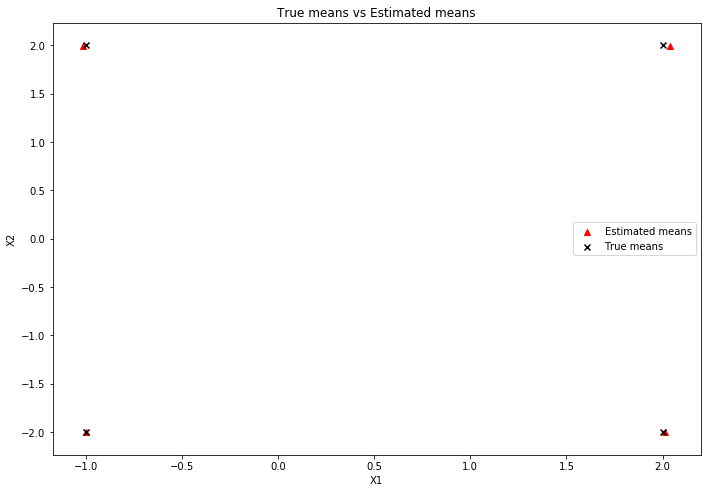

In [383]:
plt.axes([1,1,1.5,1.5])
# plt.scatter(data[0,indices[0]], data[1,indices[0]], alpha = 0.2)
# plt.scatter(data[0,indices[1]], data[1,indices[1]], alpha = 0.2)
# plt.scatter(data[0,indices[2]], data[1,indices[2]], alpha = 0.2)
# plt.scatter(data[0,indices[3]], data[1,indices[3]], alpha = 0.2)
plt.scatter(mu_est[:,0], mu_est[:,1], marker='^', c = 'red')
plt.scatter(mu_true.reshape(4,2)[:,0], mu_true.reshape(4,2)[:,1], marker = 'x', c = 'black')
plt.legend(('Estimated means', 'True means'))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('True means vs Estimated means')

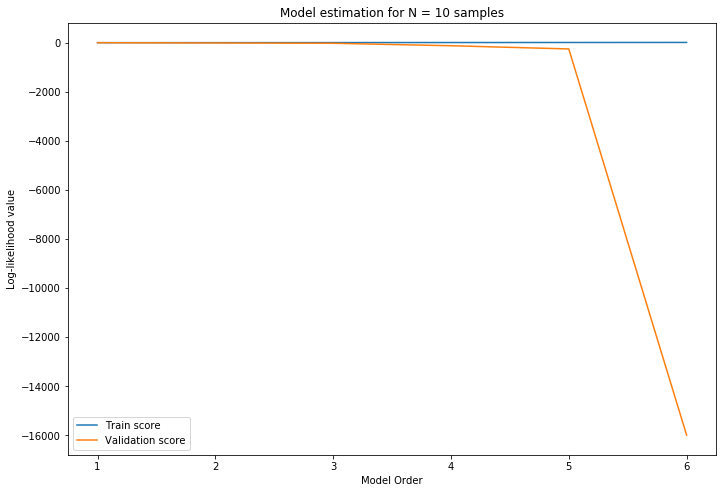

In [356]:
plt.axes([1,1,1.5,1.5])
plt.plot([1,2,3,4,5,6],pred_test[0])
plt.plot([1,2,3,4,5,6], pred[0])
plt.xlabel('Model Order')
plt.ylabel('Log-likelihood value')
plt.title('Model estimation for N = 10 samples')
plt.legend(('Train score', 'Validation score'))

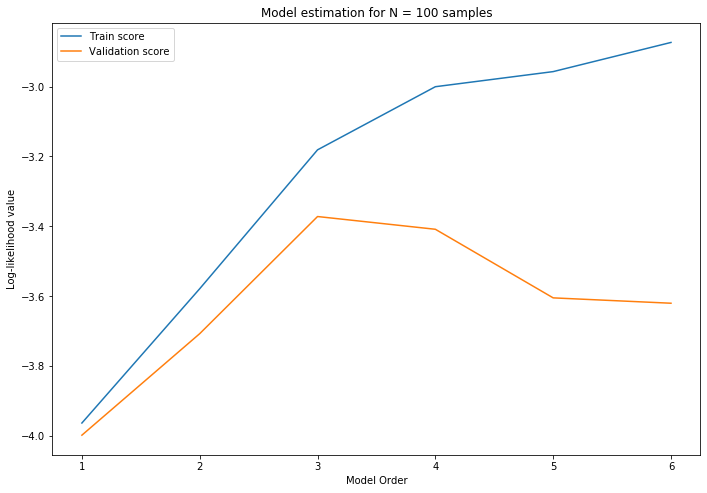

In [355]:
plt.axes([1,1,1.5,1.5])
plt.plot([1,2,3,4,5,6],pred_test[1])
plt.plot([1,2,3,4,5,6], pred[1])
plt.xlabel('Model Order')
plt.ylabel('Log-likelihood value')
plt.title('Model estimation for N = 100 samples')
plt.legend(('Train score', 'Validation score'))

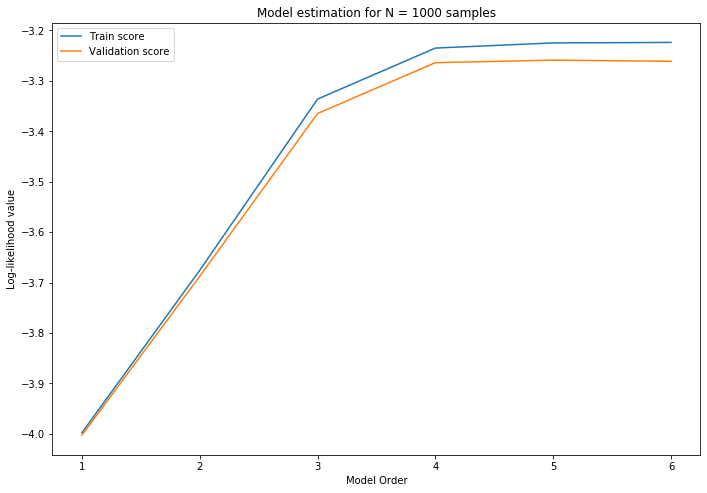

In [358]:
plt.axes([1,1,1.5,1.5])
plt.plot([1,2,3,4,5,6],pred_test[2])
plt.plot([1,2,3,4,5,6],pred[2])
plt.xlabel('Model Order')
plt.ylabel('Log-likelihood value')
plt.title('Model estimation for N = 1000 samples')
plt.legend(('Train score', 'Validation score'))

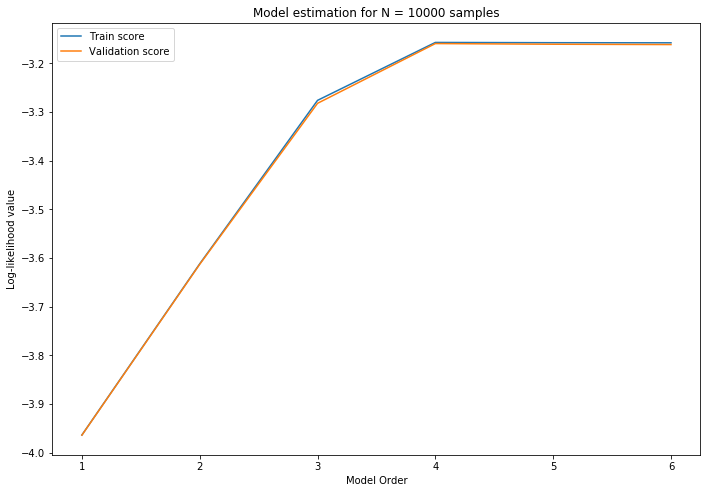

In [360]:
plt.axes([1,1,1.5,1.5])
plt.plot([1,2,3,4,5,6],pred_test[3])
plt.plot([1,2,3,4,5,6],pred[3])
plt.xlabel('Model Order')
plt.ylabel('Log-likelihood value')
plt.title('Model estimation for N = 10000 samples')
plt.legend(('Train score', 'Validation score'))

###Answer 2

In [0]:
def multi(n, mu, sig, x):
  '''
  Input: n-dimention, mu-mean, sig-covariance matrix, x-data vector
  returns the probability p(x/c1) distribution of the sample
  '''
  return ((2*np.pi)**(-n/2))*(np.linalg.det(sig)**(-0.5))*(np.exp(-0.5*(x.reshape(2,1) - mu.reshape(2,1)).T@np.linalg.inv(sig)@(x.reshape(2,1) - mu.reshape(2,1))))

In [0]:
def linear_transform(N, n, mean, sigma, pl):
  '''
  Input: N-samples, n-dimension, mu-mean vector, sig-covariance matrix
  returns random samples generated according to mu and sig by linear transformation technique from zero mean and identity covariance
  '''
  
  number = np.zeros(2,)
  tempo = np.random.rand(1,N) 
  
  # determine the number of samples to be generated for each class
  number[0] = len(np.where((tempo <= pl[0]))[0])
  number[1] = len(np.where((tempo >= pl[0]))[0])
  
  # generate the samples
  c1 = np.random.multivariate_normal(mean[0,:,:].reshape(2,), sigma[0,:,:], int(number[0])).T
  c2 = np.random.multivariate_normal(mean[1,:,:].reshape(2,), sigma[1,:,:], int(number[1])).T
    
  return (c1,c2)

In [0]:
N = 999
n = 2
pl = np.array([0.3, 0.7])
mean = np.array([[-1, 0], [1.5, 0]]).reshape(2,2,1)
sigma = np.array([[1.2, -0.4, -0.4, 0.5], [1.5, 0.4, 0.4, 0.2]]).reshape(2,2,2)

class1, class2 = linear_transform(N, n, mean, sigma, pl)

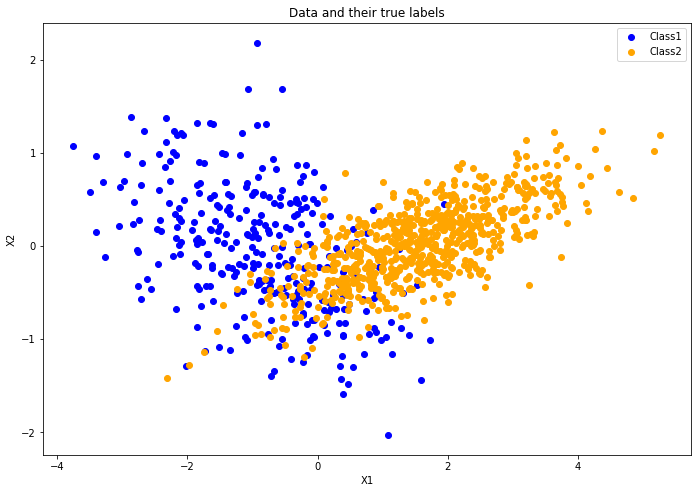

In [432]:
plt.axes([1,1,1.5,1.5])
plt.scatter(class1[0,:], class1[1,:], marker = 'o', c = 'blue')
plt.scatter(class2[0,:], class2[1,:], marker = 'o', c = 'orange')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their true labels')
plt.legend(('Class1', 'Class2'))

In [0]:
g11 = np.zeros(class1.shape[1])
g12 = np.zeros(class2.shape[1])
g21 = np.zeros(class1.shape[1])
g22 = np.zeros(class2.shape[1])
for i in range(class1.shape[1]): 
  g11[i] = multi(2, mean[0,:,:], sigma[0,:,:], class1[:,i]) 
  g21[i] = multi(2, mean[1,:,:], sigma[1,:,:], class1[:,i]) 
for i in range(class2.shape[1]):
  g12[i] = multi(2, mean[0,:,:], sigma[0,:,:], class2[:,i]) 
  g22[i] = multi(2, mean[1,:,:], sigma[1,:,:], class2[:,i]) 
  
decide1 = np.log(g11) - np.log(g21) + np.log(pl[0]) - np.log(pl[1]) 
decide2 = np.log(g22) - np.log(g12) + np.log(pl[1]) - np.log(pl[0])

In [434]:
# if c1decide1 > 0, the points belong to class 1 but since we want the missclassified points look for c1decide1 < 0
t1 = np.argwhere(decide1 < 0)
print("The number of samples that belong to class 1 but got classifed as class 2: {} samples".format(t1.shape[0]))

The number of samples that belong to class 1 but got classifed as class 2: 75 samples


In [435]:
# if c1decide2 > 0, the points belong to class 2 but since we want the missclassified points look for c1decide2 < 0
t2 = np.argwhere(decide2 < 0)
print("The number of samples that belong to class 2 but got classifed as class 1: {} samples".format(t2.shape[0]))

The number of samples that belong to class 2 but got classifed as class 1: 21 samples


In [436]:
print('Error = {}'.format((t1.shape[0] + t2.shape[0])/N))

Error = 0.0960960960960961


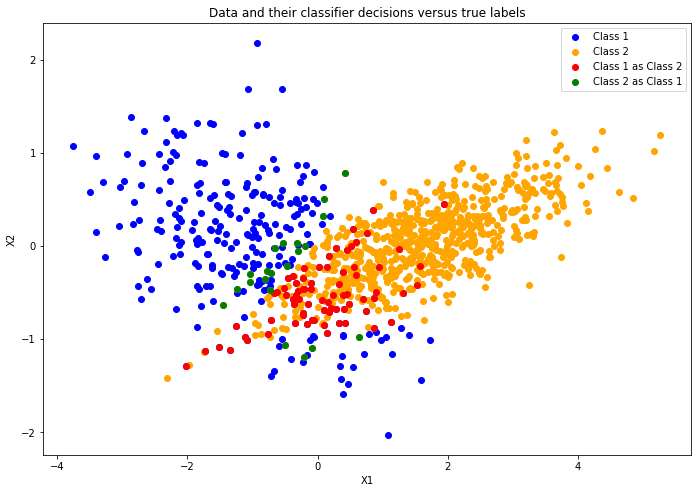

In [437]:
plt.axes([1, 1, 1.5, 1.5])
plt.scatter(class1[0,:], class1[1,:], marker = 'o', color = 'blue')
plt.scatter(class2[0,:], class2[1,:],  marker = 'o', color = 'orange')
plt.scatter(class1[0,t1], class1[1,t1],  marker = 'o', color = 'red')
plt.scatter(class2[0,t2], class2[1,t2],  marker = 'o', color = 'green')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their classifier decisions versus true labels')
plt.legend(('Class 1', 'Class 2', 'Class 1 as Class 2', 'Class 2 as Class 1'))

####Fisher LDA

In [0]:
def get_weight(mu, sigma):
  '''
  Input: mu-mean, sig-covariance matrix
  returns the eigen vector which needs to be used to project the data using the Linear Discriminant Analysis
  '''
  sb = (mu[0,:,:].reshape(2,1) - mu[1,:,:].reshape(2,1))@(mu[0,:,:].reshape(2,1) - mu[1,:,:].reshape(2,1)).T # In between scatter matrix
  sw = sigma[0,:,:] + sigma[1,:,:] # Within scatter matrix
  #   print(sb, sw)
  mat = np.linalg.inv(sw)@sb 
  vals, vecs = np.linalg.eig(mat) 
  return vecs[:,np.argmax(vals)] # returning the eigen vector corresponding to the max eigen value

Number of samples of class 1 classified as class 2: 55
Number of samples of class 2 classified as class 1: 69
Error = 0.12412412412412413


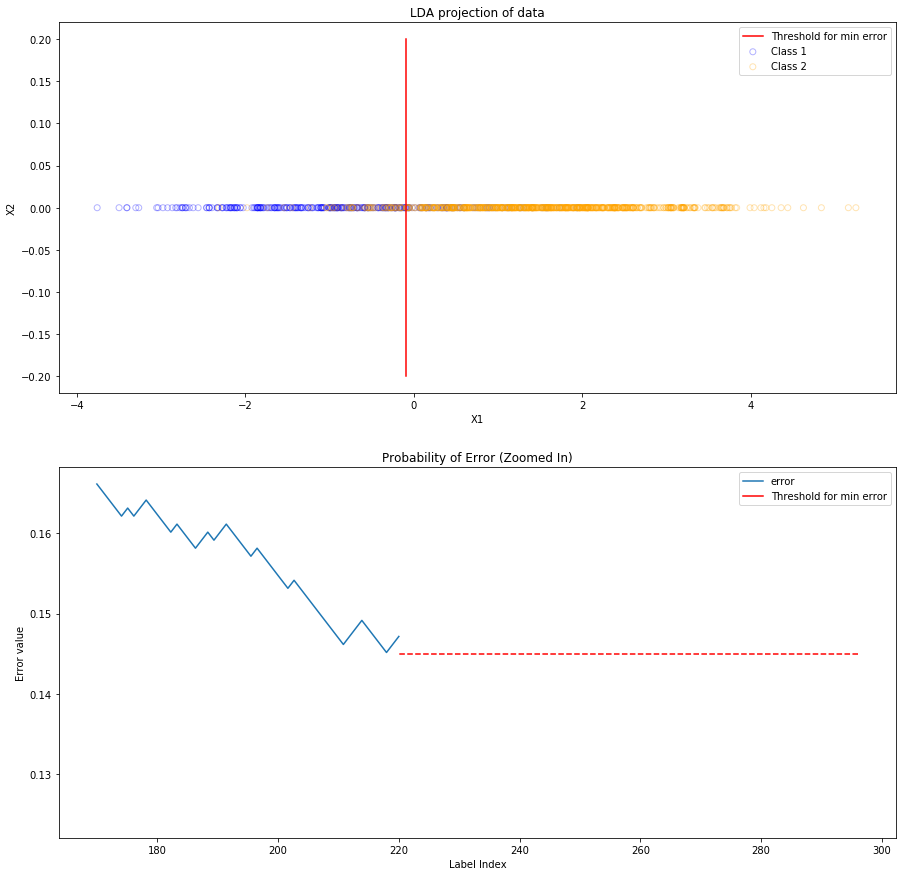

In [446]:
w = get_weight(mean, sigma)

c1lda1 = w.reshape(1,2)@class1
c1lda2 = w.reshape(1,2)@class2

# plt.axes([1,1,1,1])
# plt.scatter(c1lda1,[0]*c1lda1.shape[1], color = 'blue', facecolor = 'none', alpha = 0.3)
# plt.scatter(c1lda2,[0]*c1lda2.shape[1], color = 'orange', facecolor = 'none', alpha = 0.3)

df1 = pd.DataFrame(c1lda1.T)
df1.columns = ['Values']
df1['Class'] = pd.Series([1]*class1.shape[1])
df2 = pd.DataFrame(c1lda2.T)
df2.columns = ['Values']
df2['Class'] = pd.Series([2]*class2.shape[1])
df3 = pd.concat([df1,df2])
df3.sort_values(by = ['Values'], axis = 0, inplace = True)
df3.reset_index(inplace = True)

# df3
error = []
erc1 = class1.shape[1]
erc2 = 0
for val in df3.index:
  if(df3.iloc[val]['Class'] == 1):
    erc1 = erc1 - 1
  elif(df3.iloc[val]['Class'] == 2):
    erc2 = erc2 + 1
    
  error.append(erc1+erc2)

err_arr = np.array(error)/999 # array of error values
min_indices = np.where(err_arr == err_arr.min())[0] #Get the indices where the error value is minimum
min_idx = min_indices[len(min_indices)//2] # choose the index which is at equal distance from both the classes
min_val = df3.iloc[min_idx]['Values'] # the value at min index
df3['Values'] = df3['Values'] - min_val
c1_miss = df3[(df3['Values'] < 0) & (df3['Class'] == 2)].shape[0] 
c2_miss = df3[(df3['Values'] > 0) & (df3['Class'] == 1)].shape[0]

print('Number of samples of class 1 classified as class 2: {}'.format(c1_miss))
print('Number of samples of class 2 classified as class 1: {}'.format(c2_miss))
print('Error = {}'.format((c1_miss + c2_miss)/999))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
ax2.plot(np.linspace(170,220,50), err_arr[170:220]) # 370,420
ax2.plot([min_idx, min_idx], [err_arr[min_idx], err_arr[min_idx]], color = 'red')
ax2.plot([min_idx, 220], [0.145, 0.145], 'r--')
ax2.set_title('Probability of Error (Zoomed In)')
ax2.set(xlabel='Label Index', ylabel='Error value')
ax2.legend(('error', 'Threshold for min error'))

# fig.axes([1,1,1.5,1.5])
ax1.scatter(c1lda1,[0]*class1.shape[1], color = 'blue', facecolor = 'none', alpha = 0.3)
ax1.scatter(c1lda2,[0]*class2.shape[1], color = 'orange', facecolor = 'none', alpha = 0.3)
ax1.plot([min_val, min_val], [-0.2,0.2], color = 'red')
ax1.set_title('LDA projection of data')
ax1.set(xlabel='X1', ylabel='X2')
ax1.legend(('Threshold for min error', 'Class 1', 'Class 2'))

####Logistic Regression

In [0]:
x = np.concatenate((class1, class2), axis = 1)
w = np.random.rand(n,1)
b = np.random.rand(1,1)
true_true_vals = w.T@x + b
# z = 1/(1 + np.exp(true_vals)) # w.T@x + b
c1_labels = np.zeros([1,class1.shape[1]])
c2_labels = np.ones([1,class2.shape[1]])
y = np.concatenate((c1_labels, c2_labels), axis = 1)
print(w.shape)
# Grad ascent
alpha = 0.0001
i = 0
cost = []
while (i < 20000):
  theta = w.T@x + b
  z = 1/(1 + np.exp(theta))
  dw = (1/N)*(z - y)@x.T
  db = (1/N)*np.sum((z - y), axis = 1)
  w = w + alpha*dw.T
  b = b + alpha*db.reshape(1,1)
  cost.append(-np.mean(y*np.log(z) + (1 - y)*np.log(1 - z)))
  i += 1

pred = w.T@x + b

Text(0, 0.5, 'Error')

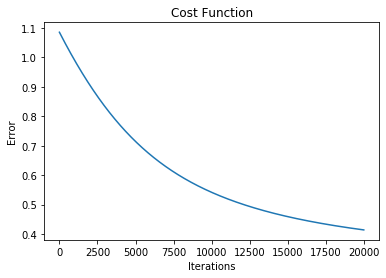

In [447]:
plt.plot([i for i in range(20000)], cost)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')

In [0]:
print('Number of points of Class 1 classified as Class 2: {}'.format(class1.shape[1] - np.where(pred>0.5)[0].shape[0]))
print('Number of points of Class 2 classified as Class 1: {}'.format(-class2.shape[1] + np.where(pred<0.5)[0].shape[0]))


In [443]:
print(np.where(pred>0.5)[0].shape[0], np.where(pred<0.5)[0].shape[0])

225 774


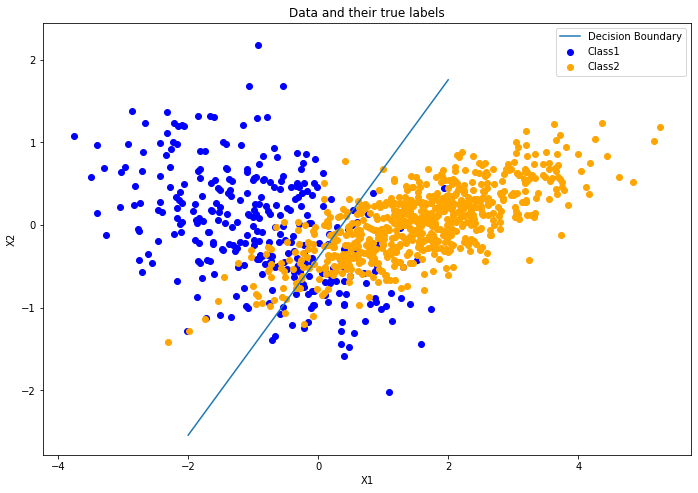

In [444]:
plt.axes([1,1,1.5,1.5])

x_ol = np.linspace(-2,2,10)
# w_ol = w.reshape(2,)
y = -(w[0]/w[1])*x_ol - b/w[1]

plt.plot(x_ol, y.reshape(10,))
plt.scatter(class1[0,:], class1[1,:], marker = 'o', c = 'blue')y
plt.scatter(class2[0,:], class2[1,:], marker = 'o', c = 'orange')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their true labels')
plt.legend(('Decision Boundary', 'Class1', 'Class2'))